# [WK] Projekt 1 - Opis obrazu
#### Autorzy: Agnieszka Klimek (145302), Anna Prałat (145395), Daniel Zdancewicz (145317)

## Opis zadania
Śledzenie gry w bilard.
Dla filmów przedstawiających grę w bilard (dowolna odmiana) zaproponuj system:
- Wykrywania bili
- Śledzenia bili
- Wykrywania zdarzeń na filmie
Należy samodzielnie przygotować odpowiednie dane wejściowe.

## Założenia
Jako przyjętą reprezentację obrazu przyjęto filmy gry w snookera z perspektywy ptaka (bird view).
Założono, że kamera jest nieruchoma, a stół do gry jest prostokątem. DOdatkowo założono, że
kamera jest umieszczona nad środkiem stołu, a kąt nachylenia kamery jest równy 90 stopni.

Jako zdarzenia, które są wykrywane na filmie:
- Wbicie bili do łuzy
- Zderzenie bili z drugą bilą


## Technika wykrywania bil na obrazie

1. Wczytanie obrazu
2. Przekształcenie obrazu do skali szarości
3. Zastosowanie filtru Gaussa
4. Zastosowanie binaryzacji
5. Zastosowanie operacji poprawnego wypełnienia dziur
6. Rozpoznanie 6 masek (po jednej dla każdego rodzaju bili)
7. Rozpoznanie konturów bili
8. Zapis pozycji zawierających kontury w kolejnych klatkach filmu
9. Zastosowanie prostych równań fizycznych na podstawie pozycji do wyznaczenia pozycji bili w kolejnych klatkach filmu
10. Wykrywanie zdarzeń na podstawie momentum kuli


# Importy

In [26]:
import matplotlib
import PIL
from cv2 import VideoCapture, CAP_PROP_FPS
import numpy as np
from dataclasses import dataclass, field
from random import choice

## Wczytanie filmu

In [23]:
if 'google.colab' in str(get_ipython()):
  from google.colab.patches import cv2_imshow

  imshow = cv2_imshow
else:
  def imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
      if a.shape[2] == 4:
        a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
      else:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))

In [39]:
@dataclass
class VideoInfo(object):
  fps: float
  width: int
  height: int
  frames: list[np.ndarray] = field(default_factory=list)

  def __len__(self):
    return len(self.frames)

  @classmethod
  def from_video(cls, video: VideoCapture):
    width = int(video.get(3))
    height = int(video.get(4))
    fps = video.get(CAP_PROP_FPS)
    frames = []
    while True:
      success, frame = video.read()
      if not success: break
      frames.append(frame)

    return cls(fps, width, height, frames)

  def sample(self):
    return choice(self.frames)


In [28]:
match = VideoCapture('resources/matches/match-1-topdown-view.mp4')

video = VideoInfo.from_video(match)


Video info:
  FPS   : 25.0
  Width : 1280
  Height: 720
  Frame : 3245



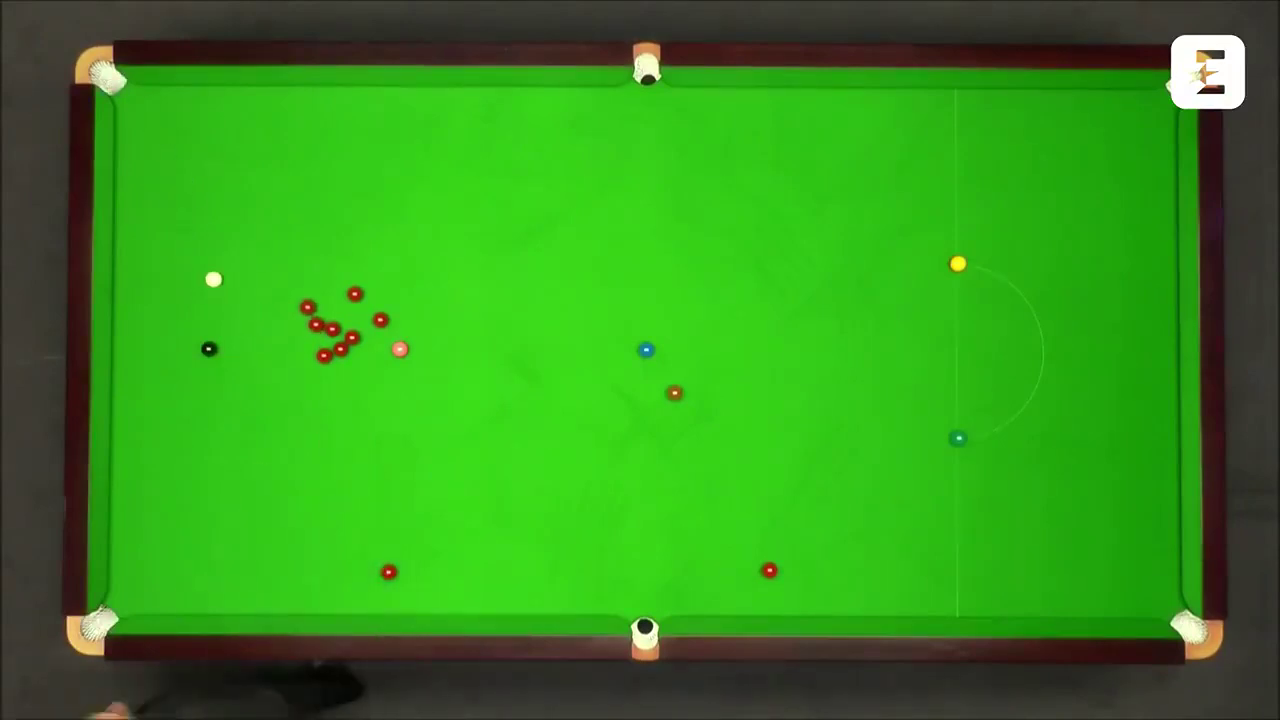

In [45]:
print(f"""
Video info:
  FPS   : {video.fps}
  Width : {video.width}
  Height: {video.height}
  Frame : {len(video)}
""")

imshow(video.sample())